In [13]:
import numpy as np
import pandas as pd
import os
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy import sparse as sps
from sklearn.metrics import mean_squared_error
from ast import literal_eval
from scipy.sparse.linalg import svds
import statistics
from math import sqrt
from scipy import sparse

### Ucitavanje podataka ratings.csv

In [14]:
data_path = 'datasets/'
ratings_filename = 'ratings.csv'

ratings_df = pd.read_csv(os.path.join(data_path, ratings_filename), usecols=['userId', 'movieId', 'rating'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

### Kreiranje matrice [broj_korisnika x broj_filmova]
Potrebno je napraviti matricu svih korisnika i svih filmova, odnosno matricu dimenzija broj_korisnika x broj_filmova. Ova matrica se moze napraviti uz pomoc funkcije pivot koja se poziva nad DataFrame-om.

In [15]:
ratings_pivot_df = ratings_df.pivot(index='userId',columns='movieId',values='rating')
ratings_pivot_df.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 9724 columns]

Nedostajuci podaci koji se javljaju prilikom ovog procesa trebaju biti zamenjeni nulama, kako bi nadalje nad njima mogla da se vrse potrebna izracunavanja.

In [16]:
pivot_ratings = ratings_pivot_df.fillna(0)
pivot_ratings.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  193583  193585  193587  193609  
userId                                   
1           0.0     0.0     0.0     0.0  
2           0.0     0.0     0.0     0.0  
3           0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     0.0  

[5 rows x 9724 columns]

Provera dimenzije matrice, odnosno broja jedinstvenih korisnika i jedinstvenih filmova. Prema podacima iz sveske Data_analysis u kojoj su ovi podaci ispitani: "Postoji 610 jedinstvenih korisnika i 9724 jedinstvenih filmova u ovom skupu podataka.".

In [17]:
pivot_ratings.shape # poklapa se sa brojem jedinstvenih korisnika odnosno filmova

(610, 9724)

Matrica ratings_pivot je retka matrica, pa se moze iskoristiti funkcija csr_matrix iz scipy.sparse paketa, koja cuva informacije o matrici na specifican nacin. #TODO dopuniti

In [18]:
ratings_csr_matrix = sps.csr_matrix(pivot_ratings)
print(ratings_csr_matrix.todense()) #toarray returns an ndarray; todense returns a matrix.

[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]


In [212]:
ratings_csr_matrix.shape

(610, 9724)

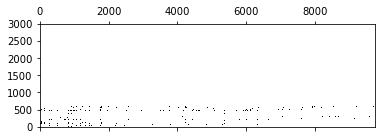

In [675]:
plt.spy(ratings_csr_matrix.toarray())
#plt.axis('equal')
plt.xlim(0, 9724)
plt.ylim(0, 3000)
plt.show()

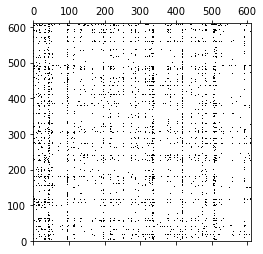

In [676]:
# posmatrano na manjem intervalu
plt.spy(ratings_csr_matrix.toarray())
plt.xlim(0, 610)
plt.ylim(0, 610)
plt.show()

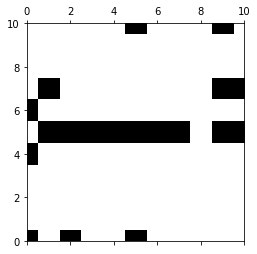

In [677]:
# posmatrano na jos manjem intervalu
plt.spy(ratings_csr_matrix.toarray())
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Podela skupa podataka na skup za trening i skup za testiranje

Naredna funkcija deli podatke na skup za treniranje i skup za testiranje u datoj razmeri. Napomena: matrice trebaju biti istih dimenzija, ali sa drugacije rasporedjenim ocenama.

In [19]:
# Podela datog skupa podataka na skup za trening i skup za test se u narednoj funkciji
# vrsi tako sto se iz datog skupa "uzima" percentage % ocena koje se upisuju u test skup,
# a uklanjaju iz trening skupa

# parametar ratings_csr_matrix je skup podataka koji treba podeliti na trening i test skup
# percentage je broj koji predstavlja procenat ocena koje ulaze u test skup

def split_train_test(ratings_csr_matrix, percentage):
    
    test_ratings_number = percentage / 100
    print("Odnos ocena u skupu za testiranje: ", percentage, "%")
    print("Odnos ocena u skupu za treniranje: ", 100-percentage, "%")

    total_ratings = ratings_csr_matrix.toarray()

    dimensions_of_total_ratings = total_ratings.shape
    print("Ukupan broj korisnika: ", dimensions_of_total_ratings[0])
    print("Ukupan broj filmova: ", dimensions_of_total_ratings[1])

    test = np.zeros(dimensions_of_total_ratings)
    train = total_ratings.copy()

    nonzero_ratings_per_row = (total_ratings != 0).sum(1)
    print("Ukupan broj ne-nula ocena u svim redovima: \n", nonzero_ratings_per_row)
    
    for user in range(dimensions_of_total_ratings[0]):
        
        nonzero_test_ratings_per_user = int(np.ceil(test_ratings_number*nonzero_ratings_per_row[user])) # ispod - indeksi ne-nula elemenata
        # print("Ukupan broj ne-nula ocena u test skupu po korisniku: ", nonzero_test_ratings_per_user)
        
        test_ratings = np.random.choice(total_ratings[user, :].nonzero()[0], size = nonzero_test_ratings_per_user, replace = False)

        train[user, test_ratings] = 0 # izbacuju se iz trening skupa (upisuju se nule na odabranim pozicijama)

        test[user, test_ratings] = total_ratings[user, test_ratings] # ubacuju se u test skup (upisuju se ocene iz polaznog skupa, koje su uklonjene iz trening skupa)
        
    if (not(np.all((train * test) == 0))):
        print("Greska!")
    else:    
        return sps.csr_matrix(train),sps.csr_matrix(test)

In [106]:
ratings_csr_reduced = ratings_csr_matrix[:30, :90]
ratings_csr_reduced.shape

(30, 90)

In [107]:
train_and_validation, test = split_train_test(ratings_csr_reduced, 20)

Odnos ocena u skupu za testiranje:  20 %
Odnos ocena u skupu za treniranje:  80 %
Ukupan broj korisnika:  30
Ukupan broj filmova:  90
Ukupan broj ne-nula ocena u svim redovima: 
 [ 7  0  1  6  7 46  3  9  1  0  5  1  1  8  3  2  4 10 20  5  7  0  5  3
  0  3  6 10  1  0]


In [117]:
train_and_validation.shape, test.shape

((30, 90), (30, 90))

### Funkcija za sortiranje liste opadajuce

In [108]:
def sort_descending(li):
    # reverse (Optional) - If True, the sorted list is reversed (or sorted in descending order).
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of 
    # sublist lambda has been used
    li.sort(key = lambda x: x[0], reverse=True)
    return li

### User based

In [23]:
def user_based_ratings_prediction(u, i, users_similarity, ratings, k = 5):
    
    neighbors = []
    similarities = list(zip(users_similarity[u][:], range(users_similarity.shape[0])))  # broj korisnika

    similarities_sorted = sort_descending(similarities)
    
    # najslicnijih k
    for i in range(1, k + 1):
        neighbors.append(similarities_sorted[i][1])
    print ("neighbors: ", neighbors)

    rated_by_u = ratings[u].nonzero()[1]
    print("Ocenio korisnik u: ", rated_by_u)
    
    user_u_mean = 0
    arr = ratings[u, :].toarray()[0]
    user_u_mean = sum(arr)
        
    if len(rated_by_u) != 0:
        user_u_mean = user_u_mean / len(rated_by_u) # prosecna ocena u-tog korisnika
        
    numerator, denominator = 0.0, 0.0

    for v in neighbors:
        rated_by_v = ratings[v].nonzero()[1]
        user_v_mean = 0
        # user_v_mean = sum(ratings[v, :].toarray()[0])
            
        if len(rated_by_v) != 0:
            for i in rated_by_v:
                user_v_mean += ratings[v, i]
            
            user_v_mean = user_v_mean / len(rated_by_v)
      

        r_vi = ratings[v,i]
        numerator += users_similarity[u][v]*(r_vi - user_v_mean)
        denominator += users_similarity[u][v]
        
    return user_u_mean + numerator/denominator

### Item based

In [165]:
def item_based_ratings_prediction(u, i, movies_similarity, ratings, k = 5):        

    neighbors = []
    print("Movies similarity shape: ", movies_similarity.shape)
    similarities = list(zip(movies_similarity[i][:],range(movies_similarity.shape[0])))
    
    similarities_sorted = sort_descending(similarities)
    
    for i in range(1,k+1):
        neighbors.append(similarities_sorted[i][1])
        
    rated_i = ratings[:, i].nonzero()[0]
        
    item_i_mean = 0
    item_i_mean = sum(ratings[:, i].toarray()[0])
    
    if len(rated_i) != 0:
        item_i_mean = item_i_mean / len(rated_i)
        
    numerator, denominator = 0.0, 0.0
        
    for j in neighbors:
        rated_j = ratings[:, j].nonzero()[0]
        item_j_mean = 0
        
        if len(rated_j) != 0:
            arr2 = ratings[:, j].toarray()[0]
            item_j_mean = sum(arr2)
            item_j_mean = item_j_mean / len(rated_j)
        
        r_uj = ratings[u,j]
        numerator += movies_similarity[i][j]*(r_uj - item_j_mean)
        denominator += movies_similarity[i][j]
        
    return item_i_mean + numerator/denominator

In [166]:
def get_prediction(ratings, similarity_matrix, cf_type, k = 5):
    predictions = np.zeros(ratings.shape)
    
    if cf_type == 'user':
        
        for u in range(ratings.shape[0]):
            for i in range(ratings.shape[1]):
                predictions[u,i] = user_based_ratings_prediction(u, i, similarity_matrix , ratings, k)
                
    elif cf_type == 'item':
        
        for u in range(ratings.shape[0]):
            for i in range(ratings.shape[1]):
                predictions[u,i] = item_based_ratings_prediction(u, i, similarity_matrix, ratings, k)
                
    else:
        print("Greska! Tip mora biti user ili item.")
        return

    return predictions

### Item based

In [135]:
train, validation = split_train_test(train_and_validation, 20)
similarity = cosine_similarity(train.T) + 0.000000003

k=4
predictions2 = get_prediction(train, similarity, 'item', k)

Odnos ocena u skupu za testiranje:  20 %
Odnos ocena u skupu za treniranje:  80 %
Ukupan broj korisnika:  30
Ukupan broj filmova:  90
Ukupan broj ne-nula ocena u svim redovima: 
 [ 5  0  0  4  5 36  2  7  0  0  4  0  0  6  2  1  3  8 16  4  5  0  4  2
  0  2  4  8  0  0]
ITEM 3
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.000000

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3

[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.000000

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]]
ITEM 4
ITEM 5
ITEM 6
[[9.9999994e-01 5.0978804e-01 5.1856297e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.0978804e-01 1.0000001e+00 4.9153915e-01 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [5.1856297e-01 4.9153915e-01 1.0000000e+00 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 ...
 [3.0000000e-09 3.0000000e-09 3.0000000e-09 ... 3.0000000e-09
  3.0000000e-09 3.0000000e-09]
 [3.0000000e-09 3.0000000e-09 3

In [136]:
predictions2

array([[ 0.5  ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.25 ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.25 ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-0.25 ,  0.875,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.25 ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.25 ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

### User based

In [66]:
train, validation = split_train_test(train_and_validation, 20)
similarity = cosine_similarity(train)+(0.000000000004)
k=2
predictions = get_prediction(train, similarity, 'user', k)

Odnos ocena u skupu za testiranje:  20 %
Odnos ocena u skupu za treniranje:  80 %
Ukupan broj korisnika:  10
Ukupan broj filmova:  30
Ukupan broj ne-nula ocena u svim redovima: 
 [ 2  0  0  0  1 16  0  3  0  0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1, 2]
Ocenio korisnik u:  [0]
neighbors:  [1,

neighbors:  [5, 0]
Ocenio korisnik u:  [ 1 20]
neighbors:  [5, 0]
Ocenio korisnik u:  [ 1 20]
neighbors:  [5, 0]
Ocenio korisnik u:  [ 1 20]
neighbors:  [5, 0]
Ocenio korisnik u:  [ 1 20]
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1

In [67]:
predictions

array([[4.        , 4.        , 4.        , 4.        , 4.        ,
        4.        , 4.        , 4.        , 4.        , 4.        ,
        4.        , 4.        , 4.        , 4.        , 4.        ,
        4.        , 4.        , 4.        , 4.        , 4.        ,
        4.        , 4.        , 4.        , 4.        , 4.        ,
        4.        , 4.        , 4.        , 4.        , 4.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [178]:
k_values = [1,2,3,4,5,6,7]

In [177]:
def selection(train_and_validation, k_values, cf_type):
    
    train, validation = split_train_test(train_and_validation, 20)
    errors = np.array([])
    
    if cf_type == 'user':
        
        similarity = cosine_similarity(train) + 00000000000000.4
        
        for k in k_values:
            predictions = get_prediction(train, similarity, 'user', k)
            error = np.sqrt(mean_squared_error(validation.toarray()[validation.nonzero()],predictions[validation.nonzero()]))
        
            errors = np.append(errors, error)
    else:
        
        similarity = cosine_similarity(train.T) + 00000000000000.4
        
        for k in k_values:
            predictions = get_prediction(train, similarity, 'item', k)
            error = np.sqrt(mean_squared_error(validation.toarray()[validation.nonzero()],predictions[validation.nonzero()]))
            
            errors = np.append(errors, error)
            print("ERRORS ", errors)
        
    k_optimal = k_values[np.argmin(errors)]
    
    if cf_type == 'user':
        similarity = cosine_similarity(train_and_validation) + 00000000000000.4
        predictions = get_prediction(train_and_validation, similarity, 'user', k_optimal)
        return errors, predictions
    else:
        similarity = cosine_similarity(train_and_validation.T) + 00000000000000.4
        predictions = get_prediction(train_and_validation, similarity, 'item', k_optimal)
        return errors, predictions

In [179]:
errors_user, predictions_user = selection(train_and_validation, k_values, 'user')

Odnos ocena u skupu za testiranje:  20 %
Odnos ocena u skupu za treniranje:  80 %
Ukupan broj korisnika:  30
Ukupan broj filmova:  90
Ukupan broj ne-nula ocena u svim redovima: 
 [ 5  0  0  4  5 36  2  7  0  0  4  0  0  6  2  1  3  8 16  4  5  0  4  2
  0  2  4  8  0  0]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [2

Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4]
Ocenio korisnik u:  [20 31 47]
neighb

neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbor

Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
ne

Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]

Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  [16]
Ocenio korisnik u:  [40]
neighbors:  

neighbors:  [14]
Ocenio korisnik u:  [40 46]
neighbors:  [14]
Ocenio korisnik u:  [40 46]
neighbors:  [14]
Ocenio korisnik u:  [40 46]
neighbors:  [14]
Ocenio korisnik u:  [40 46]
neighbors:  [14]
Ocenio korisnik u:  [40 46]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27]
Ocenio korisnik u

neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18]
Ocenio korisnik u:  [ 1

neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23]
Ocenio korisnik u:  [ 5

Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik u:  [32]
neighbors:  [0]
Ocenio korisnik 

neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio korisnik u:  []
neighbors:  [1]
Ocenio ko

neighbors:  [23, 27]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors: 

neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7]
Ocenio korisnik u:  [20 31 47]


Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [22, 0]
Ocenio korisnik u:  [52]
neighbors:  [22, 0]
Ocenio korisnik u:  [52]
neighbors:  [22, 0]
Ocenio korisnik u:  [52]
neighbors:  [22, 0]
Ocenio korisnik u:  [52]
neighbors:  [22, 0]
Ocenio korisnik u:  [52]
neighbors:  [22, 0]
Ocenio k

neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik

neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik

Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
neighbors:  [16, 20]
Ocenio korisnik u:  [40]
n

neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7]
Ocenio korisnik u:  

neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [18, 26]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26]
Ocenio korisnik u:  [ 1 12 44]
ne

Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors: 

neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:  [10, 22]
Ocenio korisnik u:  [5]
neighbors:

Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18]
Ocenio koris

neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik u:  []
neighbors:  [1, 2]
Ocenio korisnik

neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:

neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22]
Ocenio korisnik u:  [20 31 47]
neighbors:  [7, 16, 17]
Ocen

neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 

Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1,

Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 

neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17]
Ocenio k

neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:

Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13]
Ocenio korisnik u:  [ 0  1 15 31 33 43]


neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20]
Ocenio korisnik u:  [ 1

neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:

neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27]
Ocenio korisnik u:  [5]
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio

neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4]
Ocenio korisnik u:  [ 0 44 55]
neighbors:

neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3]
Ocenio korisnik u:  []
neighbors:

neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 

Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27]
Ocenio korisni

neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 

neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22]
Ocenio korisnik u: 

Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13]
Ocenio korisnik u:  [ 9 2

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [23, 22, 27, 0]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 

neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik

neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1]
Ocenio korisnik u:  [40]
neighbors:  

neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27]
Ocenio korisnik u:  [40 46]
neighbors:

Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 

neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5]
Ocenio korisnik u:  [ 1 12 4

neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik

neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0]
Ocenio korisnik u:  [5]
neighbors:  

neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3]
Ocenio korisnik u:  [32]


Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbor

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4]
Ocenio korisnik u:  []
neighbors:  [1, 2

neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Oce

neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17]
Ocenio korisnik u:  [20 31 47]
neighbor

neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18, 17, 22, 13]
Ocenio korisnik u:  [ 1  2  3  4  5  6  9 10 12 14 15 16 20 21 23 25 30 31 37 43 46 49 53 68
 77 78 82 84]
neighbors:  [27, 18,

neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3]

neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Oce

neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20]
Ocenio korisnik u:  [ 5

neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Oce

neighbors:  [16, 20, 0, 1, 2]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1, 2]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1, 2]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1, 2]
Ocenio korisnik u:  [40]
neighbors:  [16, 20, 0, 1, 2]
Ocenio korisnik u:  [40]
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors: 

neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20]
Ocenio korisnik u:  [40 4

neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:

neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17]
Ocenio korisnik u:  [ 1

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbor

neighbors:  [23, 27, 6, 10, 0]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5]
Ocenio korisnik u:  [5]
nei

Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2,

neighbors:  [19, 18, 4, 17, 0]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5]
Ocenio korisnik u:  []
neighbor

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neigh

Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 31 47]
neighbors:  [4, 7, 22, 27, 17, 5]
Ocenio korisnik u:  [20 3

Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18]
Ocenio korisnik u:  [ 0 20 33 46]


neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4]

Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio

Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4]
Ocenio kor

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neigh

neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1]
Ocenio korisnik u:  [ 6 18 24

Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio korisnik u:  [40 46]
neighbors:  [14, 7, 4, 27, 20, 5]
Ocenio k

Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  

neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0]
Ocenio korisnik u:  [ 1 12 44]
neighbors:

neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 

Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 31 52]
neighbors:  [23, 27, 6, 10, 0, 3]
Ocenio korisnik u:  [ 5 3

Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3

neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 2

neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 

neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17]
Ocenio korisnik u:  [ 5 43 62 89]
neighbors:  [23, 27, 13, 10, 22, 7, 17

neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 

neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio korisnik u:  [ 0 20 33 46]
neighbors:  [7, 16, 17, 3, 10, 18, 27]
Ocenio koris

neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Ocenio korisnik u:  [52]
neighbors:  [22, 0, 1, 2, 3, 4, 5]
Oceni

Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [4, 27, 16, 13, 3, 0, 17]
Ocenio korisnik u:  [ 9 20 35 43 46]
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]

neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22, 27, 0, 20, 4, 17]
Ocenio korisnik u:  [ 5  9 33]
neighbors:  [23, 22,

neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 

neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 17, 27, 5, 1, 2]
Ocenio korisnik u:  [ 6 18 24 43]
neighbors:  [0, 7, 1

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbor

Ocenio korisnik u:  [40 46]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22]
Ocenio korisnik u:  [ 0  1 15 31 33 43]
neighbors:  [27, 4, 13, 5, 18, 0, 22

Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2  9 11 12 14 44 57 62 78 81]
neighbors:  [19, 20, 5, 17, 26, 4, 10]
Ocenio korisnik u:  [ 0  1  2 

neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0, 1]
Ocenio korisnik u:  [ 1 12 44]
neighbors:  [18, 26, 20, 5, 17, 0,

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbor

neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27, 0, 5, 1, 2]
Ocenio korisnik u:  [5]
neighbors:  [10, 22, 27,

neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [32]
neighbors:  [0, 1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  [3

Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [19, 18, 4, 17, 0, 1, 2]
Ocenio korisnik u:  [ 0 44 55]
neighbors:  [22, 17, 7, 23, 0, 16, 5]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16, 5]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16, 5]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16, 5]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16, 5]
Ocenio korisnik u:  [ 5 15 22 31 43 46]
neighbors:  [22, 17, 7, 23, 0, 16, 

neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 7]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6, 

Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [23, 16, 27, 17, 15, 22]
Ocenio korisnik u:  [ 5 43 46 62 89]
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbo

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27, 17, 4]
Ocenio korisnik u:  [20 31 43 47]
neighbors:  [7, 13, 15, 27

Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14, 7, 23]
Ocenio korisnik u:  [ 0 20 33 46 52]
neighbors:  [6, 17, 22, 14,

Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25]
Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25]
Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25]
Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25]
Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25]
Ocenio korisnik u:  [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 20 21 23 24 25 30 31 32 37 42
 43 46 49 53 59 68 71 77 78 80 82 84]
neighbors:  [18, 13, 27, 7, 17, 25

neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31 32 35 43 46]
neighbors:  [16, 3, 25, 17, 27, 0]
Ocenio korisnik u:  [ 9 20 31

neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 

Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  [ 5  9 33 40]
neighbors:  [23, 22, 20, 25, 27, 0]
Ocenio korisnik u:  

neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 

Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 26, 17]
Ocenio korisnik u:  [ 0 40]
neighbors:  [6, 20, 4, 18, 

neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:  [0, 15, 7, 17, 27, 23]
Ocenio korisnik u:  [40 43 46]
neighbors:

neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  [ 0  1  2  6  9 11 12 14 18 43 44 57 58 62 78 81]
neighbors:  [20, 17, 14, 5, 26, 6]
Ocenio korisnik u:  

neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]
Ocenio korisnik u:  [ 1 12 32 44]
neighbors:  [26, 25, 18, 7, 5, 20]

Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neigh

Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10, 16, 7]
Ocenio korisnik u:  [ 5 46]
neighbors:  [22, 0, 27, 10,

Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10, 5, 18]
Ocenio korisnik u:  [ 9 32]
neighbors:  [7, 20, 19, 10,

Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 22 31 43 46 55 84]
neighbors:  [22, 23, 17, 0, 16, 7]
Ocenio korisnik u:  [ 5 15 2

neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 6]
Ocenio korisnik u:  []
neighbors:  [1, 2, 3, 4, 5, 

In [180]:
print('User-based best k: ', k_values[np.argmin(errors_user)])

User-based best k:  6


In [181]:
errors_item, predictions_item = selection(train_and_validation, k_values, 'item')

Odnos ocena u skupu za testiranje:  20 %
Odnos ocena u skupu za treniranje:  80 %
Ukupan broj korisnika:  30
Ukupan broj filmova:  90
Ukupan broj ne-nula ocena u svim redovima: 
 [ 5  0  0  4  5 36  2  7  0  0  4  0  0  6  2  1  3  8 16  4  5  0  4  2
  0  2  4  8  0  0]
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (9

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
ERRORS  [2.80329041 2.81154562 2.68332802 2.79572116 1.77933843 2.83150961]
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similar

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
ERRORS  [2.80329041 2.81154562 2.68332802 2.79572116 1.77933843 2.83150961
 2.81116059]
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Mo

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity shape:  (90, 90)
Movies similarity sh

In [182]:
print('Item-based best k: ', k_values[np.argmin(errors_item)])

Item-based best k:  5


In [183]:
k_values

[1, 2, 3, 4, 5, 6, 7]

In [184]:
errors_user

array([1.20403497, 1.08723114, 1.07752   , 1.05384923, 1.07573128,
       1.01084469, 1.02079721])

In [185]:
errors_item

array([2.80329041, 2.81154562, 2.68332802, 2.79572116, 1.77933843,
       2.83150961, 2.81116059])

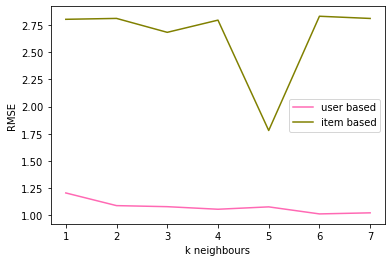

In [191]:
plt.plot(k_values, errors_user, color = 'hotpink', label = 'user based')
plt.plot(k_values, errors_item, color = 'olive', label = 'item based')
plt.legend(loc='best')
plt.xlabel('k neighbours')
plt.ylabel('RMSE')
plt.show()